In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group

from subgraph import YaleStarCatalog, StarDatabase
from utils import *


font_setting()
cmap = plt.get_cmap("ocean")

DPI = 100
FIG_SIZE = (12, 7)

In [12]:
### probrem setting
# os
log_dir = "./log/obs_stars/"
seed = 100
# param
U = 1024
theta_FOV = 20

### compute params
seed_seq = np.random.SeedSequence(seed)
np_random = np.random.Generator(np.random.PCG64(seed_seq))
theta_res = np.arctan2(2 * np.tan(theta_FOV / 2), U)
epsilon = 2 * np.sqrt(2) * theta_res
theta_min = epsilon
theta_max = 2 * np.arctan(np.sqrt(2) * np.tan(theta_FOV / 2))

theta_FOV_list = [5, 10, 20, 40, 80]
M_lim_list = [3.5, 4.5, 5.5]
beta_list = [0.0, 0.2, 0.4, 0.6, 0.8]


----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
----- Star Database -----
the number of stars : 861
the range of magnitude : [-1.46, 4.49]
----- Star Database -----
the number of stars : 279
the range of magnitude : [-1.46, 3.49]


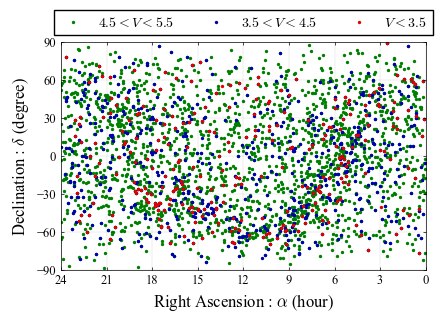

In [ ]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# plot 
fig = plt.figure(figsize=(4.8, 3), dpi=100)
ax = fig.add_subplot(111)
s = 2
alpha = 1.0
# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": (0.0, 0.5, 0.0, 1.0), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
ax.scatter(D_DB.get_RA() * 12 / np.pi, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
lb = 3.5
M_lim = 4.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": (0.0, 0.0, 0.7, 1.0), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
ax.scatter(D_DB.get_RA() * 12 / np.pi, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
M_lim = 3.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": (0.9, 0.0, 0.0, 1.0), "alpha": alpha, "label": f"$V<{M_lim}$"}
ax.scatter(D_DB.get_RA() * 12 / np.pi, D_DB.get_DE() * 180 / np.pi, **kwargs)
# 
ax.set_xlabel('Right Ascension : $\\alpha$ (hour)')
ax.set_ylabel('Declination : $\\delta$ (degree)')
ax.set_xlim(0, 24)
ax.set_ylim(-90, 90)
ax.set_xticks(range(0, 24+3, 3))
ax.set_yticks(range(-90, 90+30, 30))
ax.invert_xaxis()
ax.legend(bbox_to_anchor=(0.5, 1.0), loc="lower center", ncol=4)

fig.savefig(f"{log_dir}/star_distribution.pdf", bbox_inches='tight')

----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
----- Star Database -----
the number of stars : 861
the range of magnitude : [-1.46, 4.49]
----- Star Database -----
the number of stars : 279
the range of magnitude : [-1.46, 3.49]


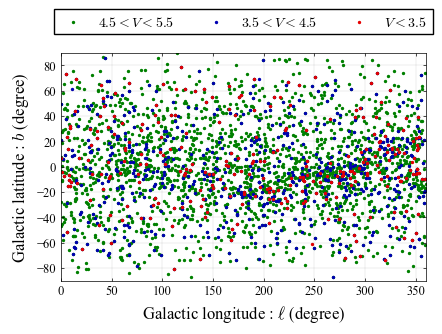

In [50]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# plot 
fig = plt.figure(figsize=(4.8, 3), dpi=100)
ax = fig.add_subplot(111)
s = 2
alpha = 1.0
# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": (0.0, 0.5, 0.0, 1.0), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())

ax.scatter(l%(2*np.pi) * 180 / np.pi, b * 180 / np.pi, **kwargs)
# 
lb = 3.5
M_lim = 4.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": (0.0, 0.0, 0.7, 1.0), "alpha": alpha, "label": f"${lb}<V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter(l%(2*np.pi) * 180 / np.pi, b * 180 / np.pi, **kwargs)
# # 
M_lim = 3.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
kwargs = {"s": s, "color": (0.9, 0.0, 0.0, 1.0), "alpha": alpha, "label": f"$V<{M_lim}$"}
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
ax.scatter(l%(2*np.pi) * 180 / np.pi, b * 180 / np.pi, **kwargs)
# 
ax.set_xlabel('Galactic longitude : $\ell$ (degree)')
ax.set_ylabel('Galactic latitude : $b$ (degree)')
ax.set_xlim(0, 360)
ax.set_ylim(-90, 90)
ax.legend(bbox_to_anchor=(0.5, 1.05), loc="lower center", ncol=3)

fig.savefig(f"{log_dir}/star_distribution_gala.pdf", bbox_inches='tight')

In [15]:
# Catalog
catalog = YaleStarCatalog(log_dir=log_dir)
df_D_C = catalog.get_df()
s_vec = equatorial2vec(catalog.get_RA(), catalog.get_DE())
df_D_C.loc[:, ("s_X", "s_Y", "s_Z")] = s_vec

# 
lb = 4.5
M_lim = 5.5
D_DB = StarDatabase(df_D_C)
D_DB.filtering_by_visual_magnitude(M_lim)
D_DB.filtering_by_multiple_stars(theta_min)
D_DB.get_info()
l,b = equatorial2galactic(D_DB.get_RA(), D_DB.get_DE())
N_milky = np.sum((-np.pi/6 < b)*(b < np.pi/6))
N_no_milky = np.sum((b < -np.pi/6)+(np.pi/6 < b))

r = 1.0
S_milky = 2*np.pi
S_no_milky = 2*np.pi

rho_milky = N_milky/S_milky
rho_no_milky = N_no_milky/S_no_milky

print(N_milky, N_no_milky)
print(rho_milky, rho_no_milky)

----- Star Database -----
the number of stars : 2708
the range of magnitude : [-1.46, 5.49]
1698 1010
270.2450933700383 160.7464925228143
